# ***MACHINE LEARNING***

## *ÍNDICE:* 
---
0. INTRODUCCIÓN
1. ANÁLISIS EXPLORATORIO DE DATOS (EDA)
    - 1.1. Acondicionamiento bases de datos
    - 1.2. Análisis visual
    - 1.3. Análisis estadístico  
2. **MACHINE LEARNING**
    - [2.1. Preparación y limpieza de datos](#21)
    - [2.2. Feature Engineering](#22)
    - [2.3. Modelado](#23)
3. RESULTADOS
    - 3.1. Visualización y reporting de los resultados
    - 3.2. Creación de un pipeline para el flujo automatizado
---

##  **2.1. Preparación y limpieza de datos**<a id='21'></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Librery
from utils.libreries import *

%matplotlib inline 
# Read all csv 

preroot=os.getcwd()
df=pd.read_csv(preroot+'/data/raw/waterQuality.csv')
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [4]:
# Transform all object columns to numeric:
df.ammonia=[float(i) if (i!='#NUM!') else np.nan for i in df.ammonia]
df.is_safe=[int(i) if (i!='#NUM!') else np.nan for i in df.is_safe]

In [5]:
df.isna().sum()*100/len(df)

aluminium      0.000000
ammonia        0.037505
arsenic        0.000000
barium         0.000000
cadmium        0.000000
chloramine     0.000000
chromium       0.000000
copper         0.000000
flouride       0.000000
bacteria       0.000000
viruses        0.000000
lead           0.000000
nitrates       0.000000
nitrites       0.000000
mercury        0.000000
perchlorate    0.000000
radium         0.000000
selenium       0.000000
silver         0.000000
uranium        0.000000
is_safe        0.037505
dtype: float64

In [6]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

##  **2.2. Feature Engineering**<a id='22'></a>

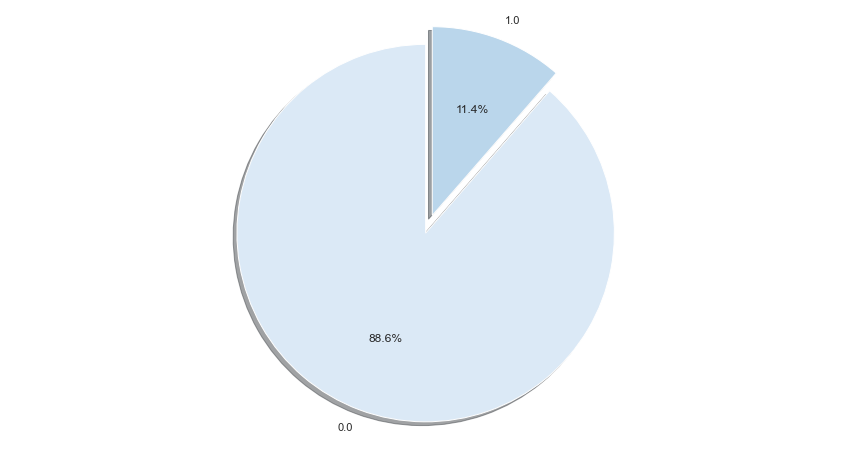

In [6]:
sns.set(rc={'figure.figsize':(15, 8)})
colors = sns.color_palette("Blues")

labels = df.is_safe.value_counts().index
sizes = df.is_safe.value_counts()
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

<AxesSubplot:xlabel='is_safe', ylabel='count'>

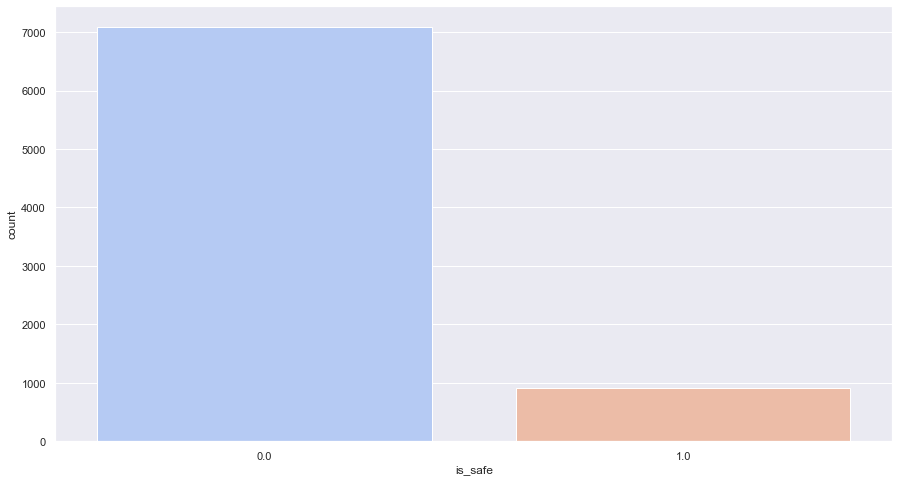

In [7]:
sns.set(rc={'figure.figsize':(15, 8)})
sns.countplot(x='is_safe',data=df,palette="coolwarm")

**Observaciones:**

- Dataset desbalanceado

**Propuestas:**

Al tener un dataset desbalanceado se buscan una serie de opciones, en este caso, suponiendo que no se puedan obtener más datos que equilibren nuestro dataset se plantean las siguientes opciones.
- Opciones para *balancear la data*:

    - Oversampling.
    - Undersampling.
    - Métodos mixtos.

Se puede apreciar visualmente a continuación: 

<img src="https://miro.medium.com/max/1400/1*o_KfyMzF7LITK2DlYm_wHw.png" alt="drawing" width="450x500"/>
<img src="https://miro.medium.com/max/1400/1*gHW_PLz7kWrhdl5t1sJRRA.png" alt="drawing" width="450x500"/>
  

##  **2.3. Modelado**<a id='23'></a>

## Baseline:

Con este apartado se pretende hacer una `prueba de contacto` con los modelos ***sin tratar los datos apenas***, ***sin buscar los hiperparámetros que mejor ajusten*** y ***sin balancear el dataset***. Simplemente para tener una noción del punto de partida y las diferencias sustanciales de cada modelo, aunque esto pueda cambiar con las modificaciones que se desarrollan posteriormente.

<class 'list'>
Saved
--------------------
LogisticRegression()
--------------------



/Users/mcgg/opt/miniconda3/envs/the_bridge_ds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


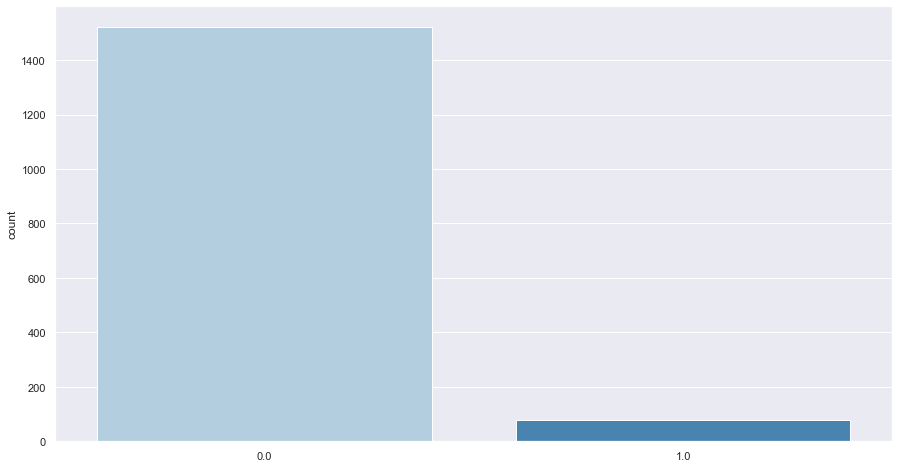

Saved
--------------------
KNeighborsClassifier()
--------------------



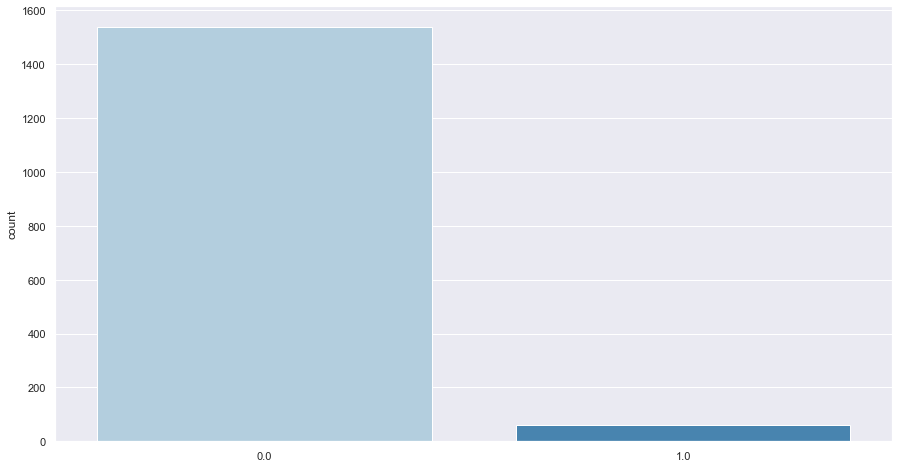

Saved
--------------------
DecisionTreeClassifier()
--------------------



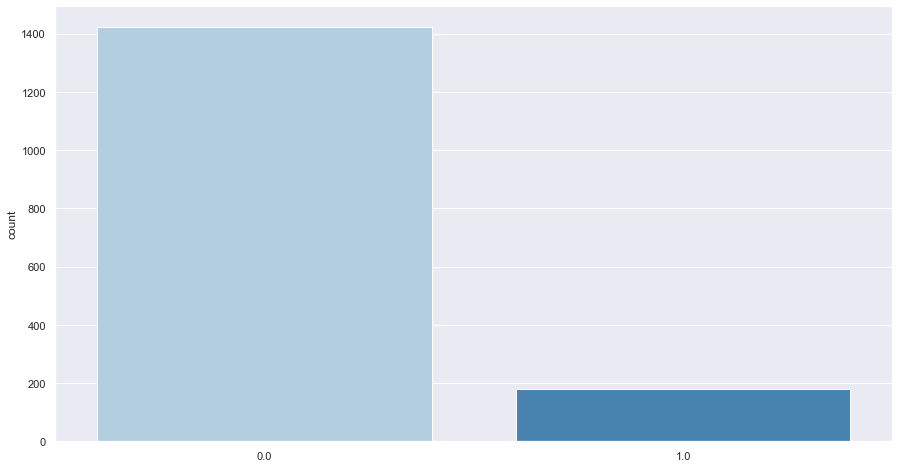

Saved
--------------------
ExtraTreeClassifier()
--------------------



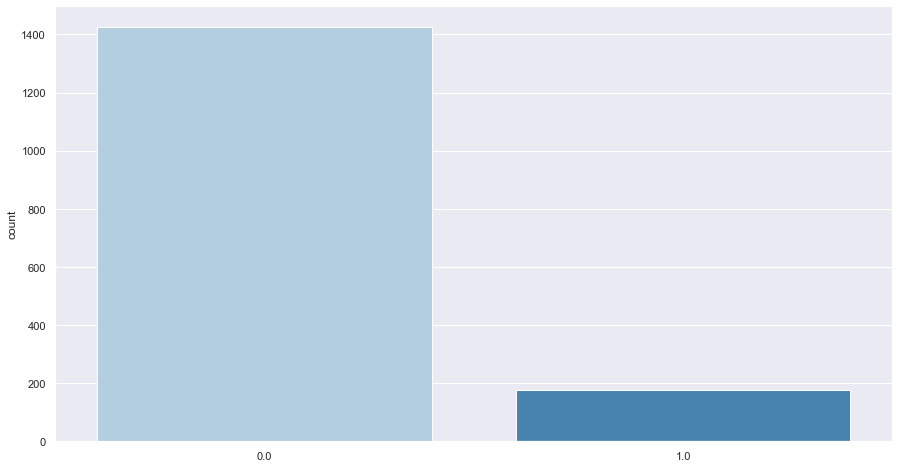

Saved
--------------------
RandomForestClassifier()
--------------------



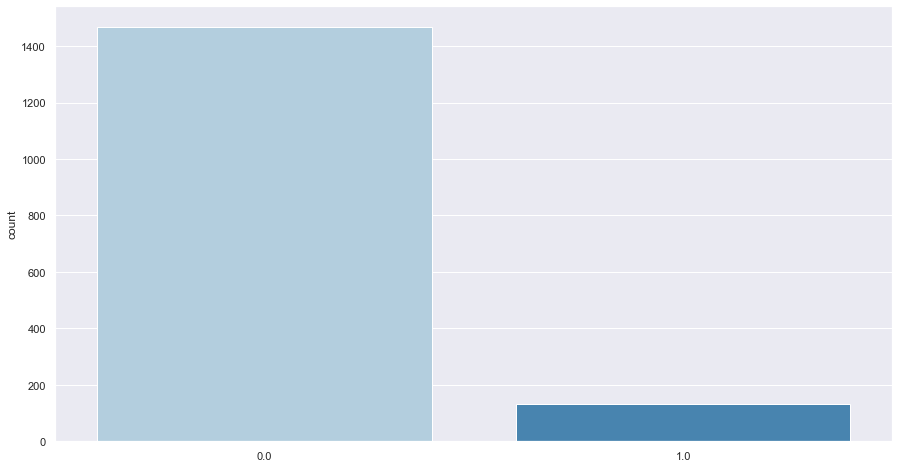

Saved
--------------------
BaggingClassifier()
--------------------



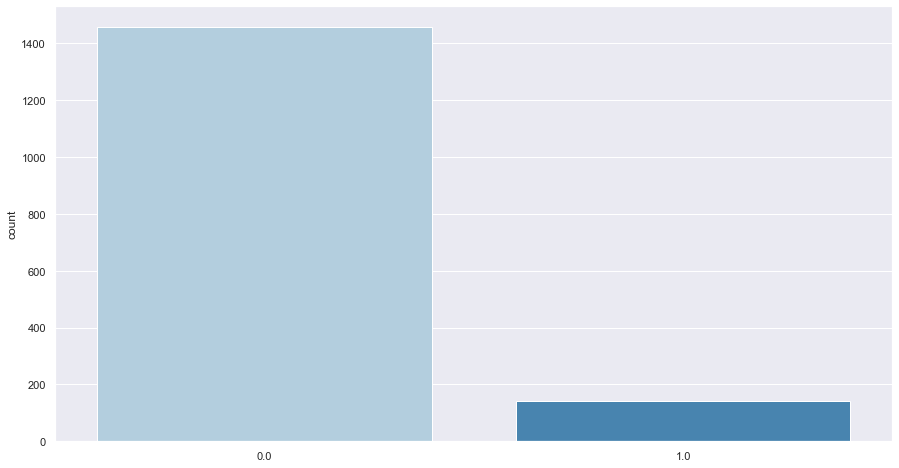

Saved
--------------------
AdaBoostClassifier()
--------------------



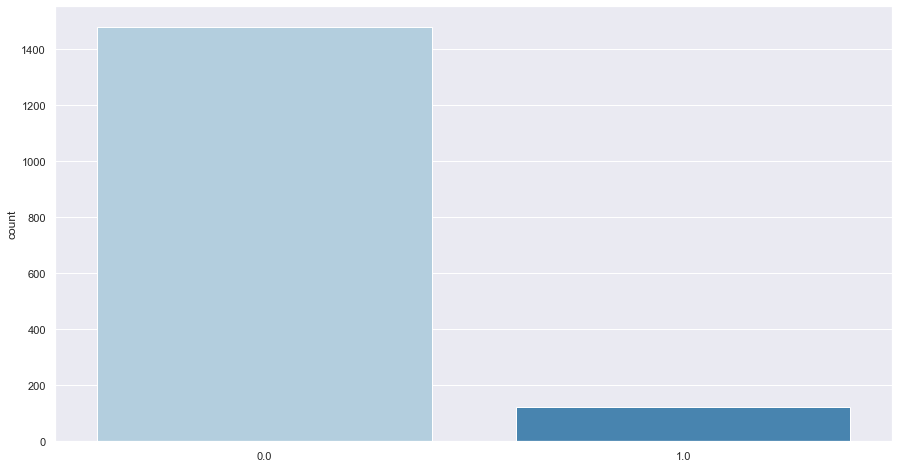

Saved
--------------------
GradientBoostingClassifier()
--------------------



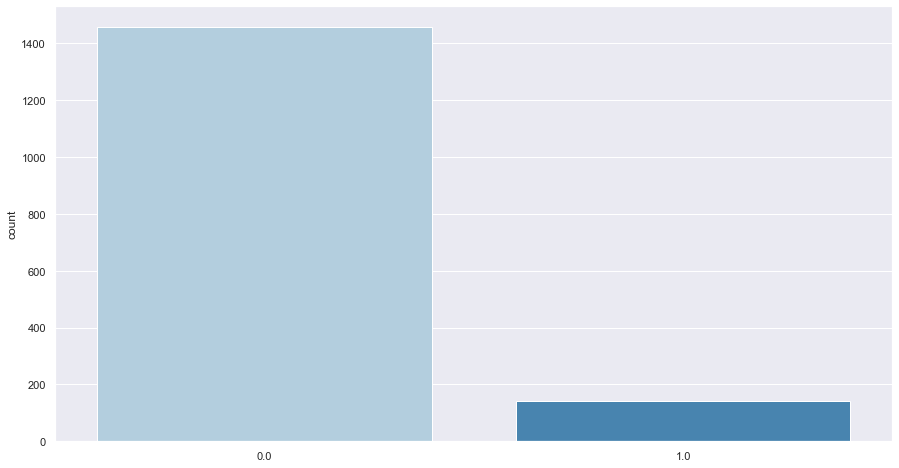

Saved
--------------------
SVC()
--------------------



/Users/mcgg/opt/miniconda3/envs/the_bridge_ds/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


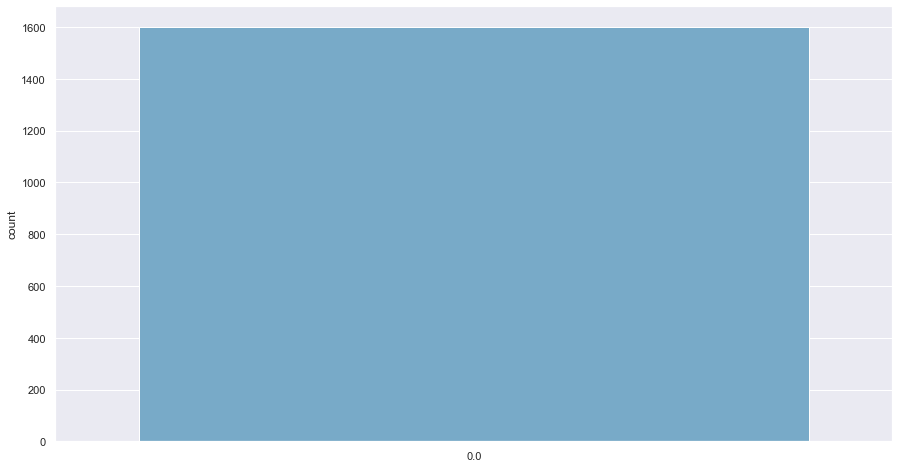

Saved
--------------------
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
--------------------



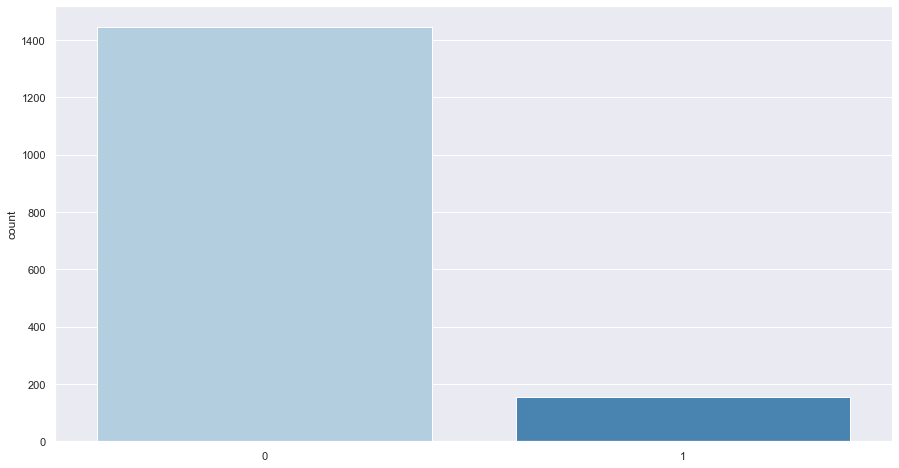

Saved
--------------------
VotingClassifier(estimators=[('RFC', RandomForestClassifier())])
--------------------



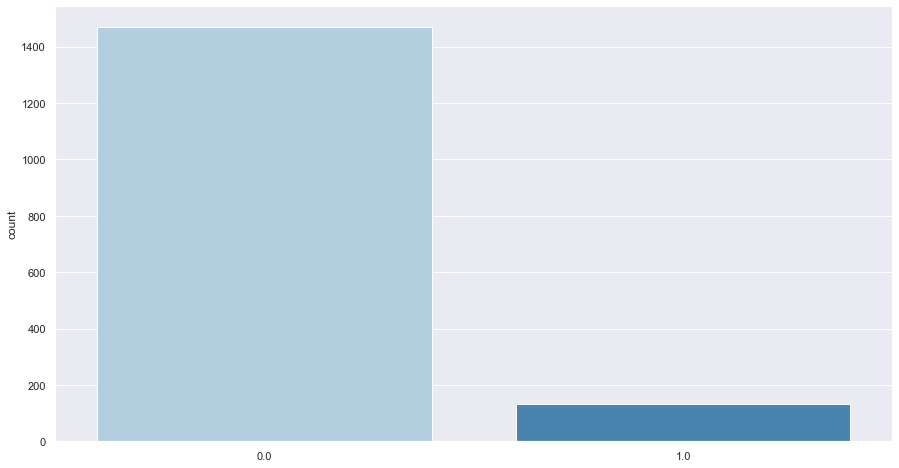

Saved
--------------------
LinearDiscriminantAnalysis()
--------------------



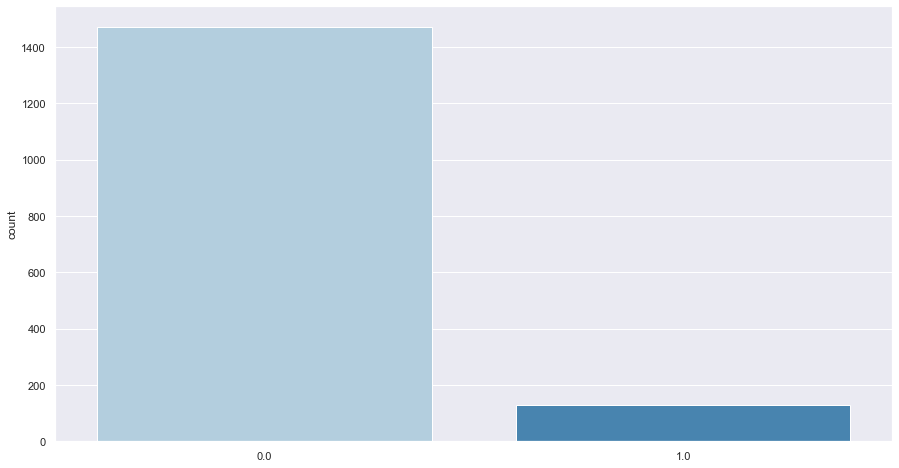

In [8]:
modelos = choose_models('all',None,clf = True)
for modelo in list(modelos.keys()):
    metricas,pack = baseline(df, 'is_safe', base_model = modelos[modelo], clf = True,file_name='baseline_metrics.csv')
    print(20*'-'+'\n'+f'{str(modelos[modelo])}'+'\n'+20*'-'+'\n')
    sns.countplot(x=pack['ypred'],palette='Blues');
    plt.show()

In [18]:
pack['trained_model'].get_params()

{'covariance_estimator': None,
 'n_components': None,
 'priors': None,
 'shrinkage': None,
 'solver': 'svd',
 'store_covariance': False,
 'tol': 0.0001}

In [ ]:
# Confusion matrix 
plt.figure(figsize= [26, 12])
matrix = confusion_matrix(pack['Xytest'][1], pack['ypred'])
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

In [11]:
x=pd.read_csv(os.getcwd()+'/model/model_metrics/baseline_metrics.csv',sep=';')
x.sort_values(by='Precision',ascending = False)

,model,ACC,Precision,Recall,F1,ROC,Jaccard
5,BaggingClassifier,0.968750,0.909091,0.778443,0.838710,0.884686,0.722222
9,XGBClassifier,0.973750,0.903226,0.838323,0.869565,0.913928,0.769231
4,RandomForestClassifier,0.961250,0.894737,0.712575,0.793333,0.851403,0.657459
7,GradientBoostingClassifier,0.965000,0.888112,0.760479,0.819355,0.874657,0.693989
10,VotingClassifier,0.957500,0.877863,0.688623,0.771812,0.838729,0.628415
6,AdaBoostClassifier,0.942500,0.804878,0.592814,0.682759,0.788033,0.518325
2,DecisionTreeClassifier,0.959375,0.786517,0.838323,0.811594,0.905903,0.682927
0,LogisticRegression,0.908750,0.632911,0.299401,0.406504,0.639582,0.255102
11,LinearDiscriminantAnalysis,0.903125,0.546154,0.425150,0.478114,0.691989,0.314159
3,ExtraTreeClassifier,0.897500,0.508571,0.532934,0.520468,0.736460,0.351779


/Users/mcgg/opt/miniconda3/envs/the_bridge_ds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mcgg/opt/miniconda3/envs/the_bridge_ds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

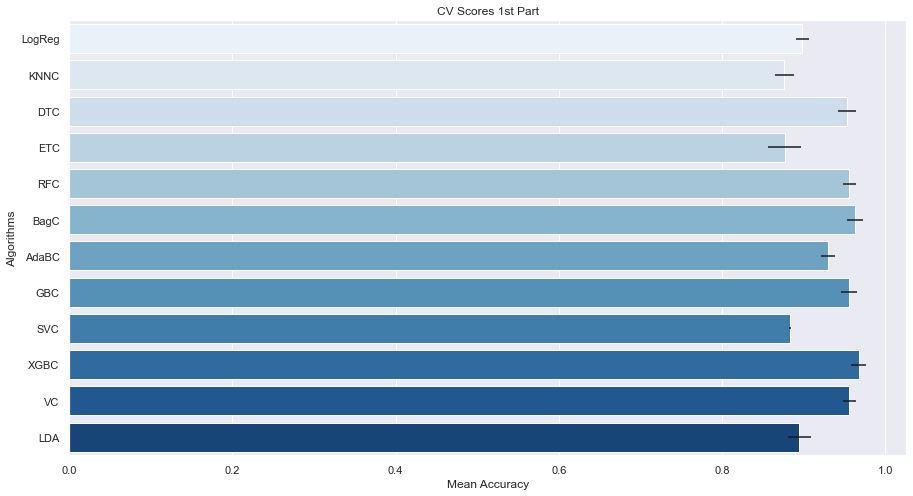

In [61]:
sns.set(rc={'figure.figsize':(15, 8)})
# Cross validate model with Kfold stratified cross val
K_fold = StratifiedKFold(n_splits=20)


# Modeling step Test differents algorithms 
random_state = 42


cv_results = [] # cross validation result
cv_means = [] # cross validation mean value
cv_std = [] # cross validation standard deviation

models = list(choose_models('all',params=None).values())

for model in models :
    cv_results.append(cross_val_score(model, pack['Xytrain'][0], pack['Xytrain'][1], 
                                      scoring = 'accuracy', cv = K_fold, n_jobs=4))

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_frame = pd.DataFrame(
    {
        "CrossValMeans":cv_means,
        "CrossValErrors": cv_std,
        "Algorithms":list(choose_models('all',params=None).keys())
    })

cv_plot = sns.barplot("CrossValMeans","Algorithms", data = cv_frame,
                palette="Blues", orient = "h", **{'xerr':cv_std})

cv_plot.set_xlabel("Mean Accuracy")
cv_plot = cv_plot.set_title("CV Scores 1st Part")

**Observaciones:**

- La metrica accuracy es bastante buena en todos los modelos probados, pero se observan mayores discrepancias en el resto de métricas evaluadas. 

- Los modelos más compensados y con mejores métricas son los cuatro primeros: 

    * BaggingClassifier
    * XGBClassifier
    * RandomForestClassifier
    * GradientBoostingClassifier

**Propuestas:**

Al tener un dataset cuyo resultado influye en la seguridad del uso, es decir, si se indica erroneamente que el agua es segura es susceptible de un daño. Por tanto es necesario elegir la métrica que proporcione mayor seguridad en el resultado, prefiriendo que el error posible sea considerar insegura un agua segura, en lugar de al contrario. 

- Opciones de *métricas de evaluación* del modelo de clasificación:

    - Accuracy.
    - Precision.
    - Recall.
    - F1.
    - Jaccard.

Se puede apreciar visualmente a continuación la diferencia entre las tres primeras métricas: 

<img src="https://www.researchgate.net/publication/346129022/figure/fig3/AS:961239823970323@1606188841513/Visualizing-accuracy-recall-aka-sensitivity-and-precision-which-are-the-common.ppm" alt="drawing" width="600x400"/>

El ***objetivo*** según nuestro dataset es ***disminuir los falsos positivos***, es decir, evitar predecir que un agua es segura y finalmente no lo sea. 

Por lo tanto, la métrica que debemos optimizar de forma prioritaria es la ***precisión***.

## Ajuste de hiperparámetros:

Con este apartado se pretende `mejorar estimadores` realizando el ***ajuste de hiperparámetros***.  

Estos estimadores se obtienen de introducir todas las variables y sin haberle realizado modificaciones significativas a sus datos: ***falta tratar los datos*** y ***balancear el dataset***. 

En algunos casos se puede observar que mejora el estimador significativamente con respecto a la prueba anterior sin modificar sus hiperparámetros.

In [ ]:
data = df.copy()
target = 'is_safe'
X = data.drop([target], axis=1)
y = data[target].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 77)

In [ ]:
K_fold = StratifiedKFold(n_splits=10)

In [ ]:
models_names = list(choose_models('all',params=None).keys())
#mods = models_names
mods = models_names[8:10]

for mod in mods:    
    models_generator(df,'is_safe',choose_models(mod,params=None),choose_params(mod),
    file_name='metrics.csv',dir_file='model/model_metrics',dir_model_file='model',scaling=False,
    scoring = { "AUC": "roc_auc","Accuracy": make_scorer(accuracy_score),'Precision': make_scorer(precision_score)})

In [ ]:
models_names = list(choose_models('all',params=None).keys())
#mods = models_names
mods = models_names[9]


models_generator(df,'is_safe',choose_models(mods,params=None),choose_params(mods),
file_name ='metrics.csv',dir_file='model/model_metrics',dir_model_file='model',scaling=False,
scoring = { "AUC": "roc_auc","Accuracy": make_scorer(accuracy_score),'Precision': make_scorer(precision_score)})

In [8]:
hyperparams_metrics = pd.read_csv('model/model_metrics/metrics.csv',sep=';').sort_values(by='Precision',ascending=False)
hyperparams_metrics

,model,params_tried,best_params,ACC,Precision,Recall,F1,ROC,Jaccard,model_path
11,GradientBoostingClassifier,"{'loss': ['deviance'], 'n_estimators': [100, 2...","{'learning_rate': 0.01, 'loss': 'deviance', 'm...",0.920000,0.975610,0.239521,0.384615,0.619412,0.238095,model/GradientBoostingClassifier_1.pkl
10,XGBClassifier,"{'nthread': [4], 'objective': ['binary:logisti...","{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.973750,0.937063,0.802395,0.864516,0.898057,0.761364,model/XGBClassifier.pkl
6,BaggingClassifier,"{'n_estimators': [10, 20, 30, 50, 100], 'max_s...","{'max_samples': 0.5, 'n_estimators': 100}",0.967500,0.919708,0.754491,0.828947,0.873407,0.707865,model/BaggingClassifier_1.pkl
8,GradientBoostingClassifier,"{'n_estimators': [10, 20, 30, 50, 100], 'max_d...","{'criterion': 'mse', 'loss': 'exponential', 'm...",0.972500,0.918367,0.808383,0.859873,0.900005,0.754190,model/GradientBoostingClassifier.pkl
4,RandomForestClassifier,"{'n_estimators': array([ 10, 25, 41, 56, 7...","{'class_weight': None, 'criterion': 'entropy',...",0.972500,0.912752,0.814371,0.860759,0.902650,0.755556,model/RandomForestClassifier.pkl
7,AdaBoostClassifier,"{'n_estimators': [10, 20, 30, 50, 100]}",{'n_estimators': 100},0.939375,0.777778,0.586826,0.668942,0.783643,0.502564,model/AdaBoostClassifier.pkl
1,KNeighborsClassifier,"{'n_neighbors': [3, 5, 7, 9, 11, 13, 15], 'wei...","{'algorithm': 'ball_tree', 'leaf_size': 20, 'n...",0.899375,0.615385,0.095808,0.165803,0.544415,0.090395,model/KNeighborsClassifier.pkl
5,BaggingClassifier,{'base_estimator': [DecisionTreeClassifier(cla...,{'base_estimator': DecisionTreeClassifier(clas...,0.916250,0.562738,0.886228,0.688372,0.902988,0.524823,model/BaggingClassifier.pkl
2,DecisionTreeClassifier,"{'criterion': ['log_loss', 'gini', 'entropy'],...","{'class_weight': 'balanced', 'criterion': 'gin...",0.912500,0.554217,0.826347,0.663462,0.874444,0.496403,model/DecisionTreeClassifier.pkl
9,SVC,"[{'C': [1, 10, 100, 1000], 'kernel': ['linear'...","{'C': 1000, 'class_weight': 'balanced', 'kerne...",0.870625,0.438650,0.856287,0.580122,0.864292,0.408571,model/SVC.pkl


/Users/mcgg/opt/miniconda3/envs/the_bridge_ds/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:542: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/Users/mcgg/opt/miniconda3/envs/the_bridge_ds/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/Users/mcgg/opt/miniconda3/envs/the_bridge_ds/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:542: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/Users/mcgg/opt/miniconda3/envs/the_bridge_ds/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='

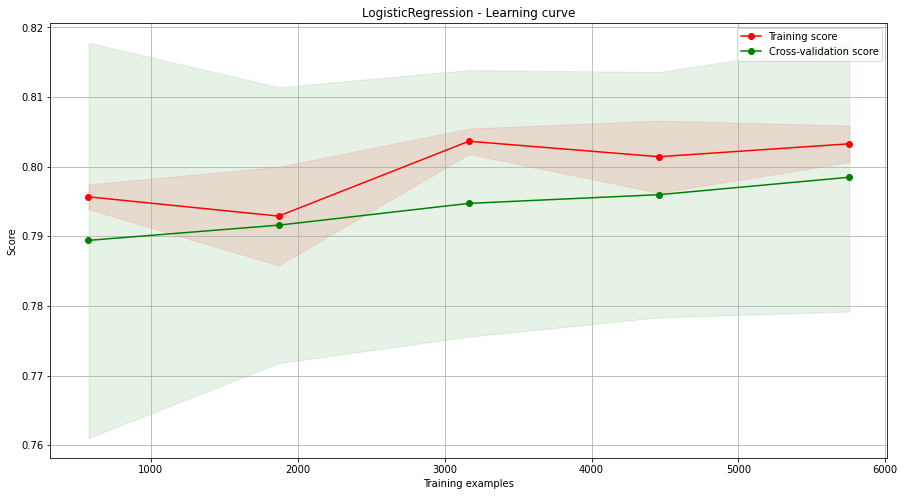

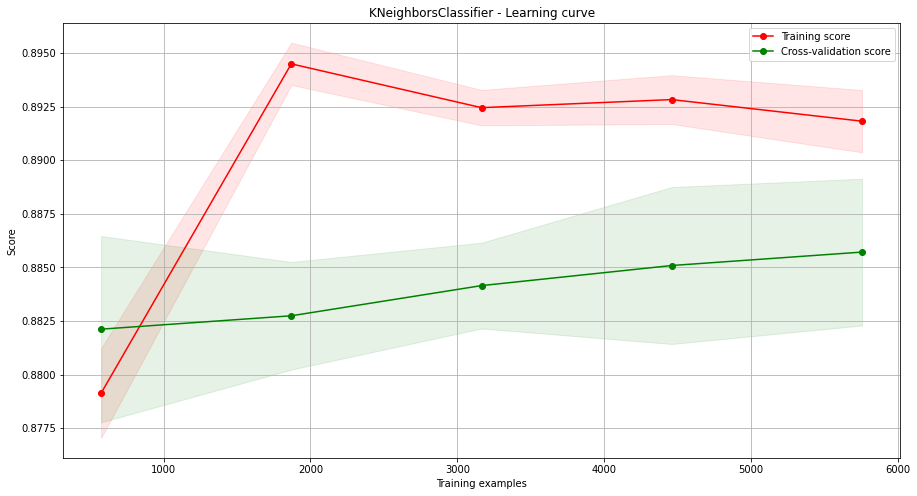

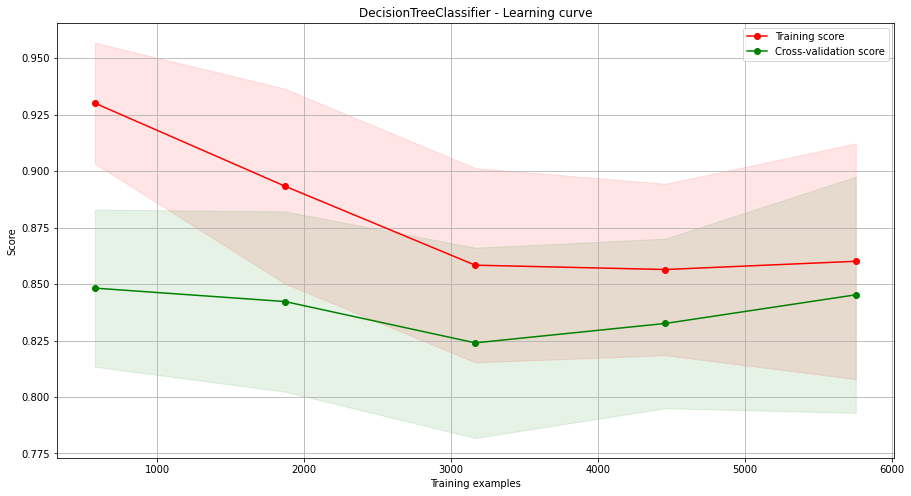

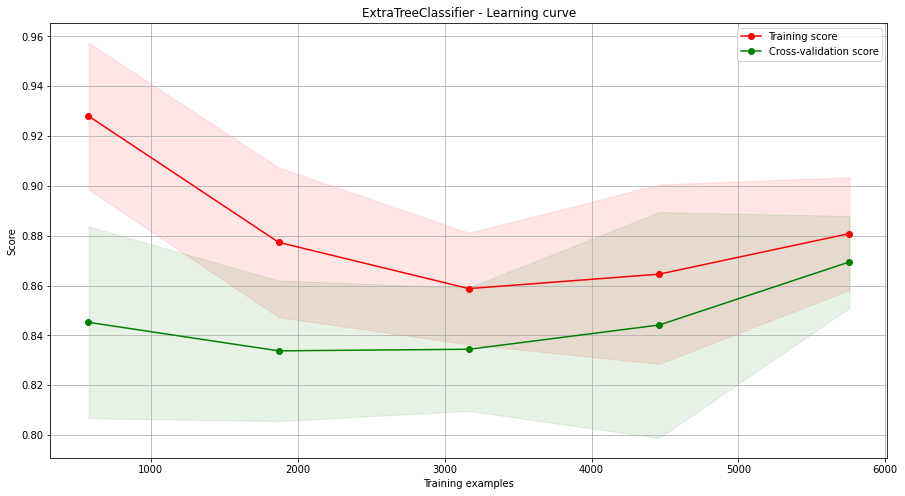

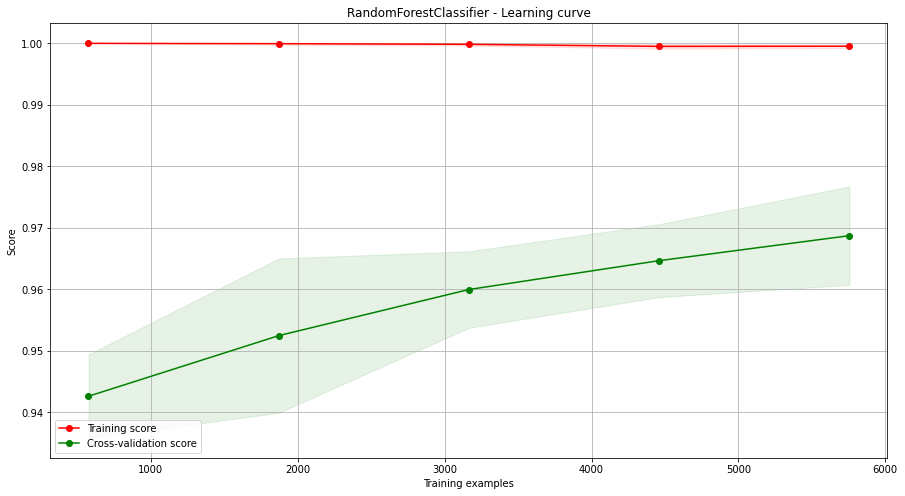

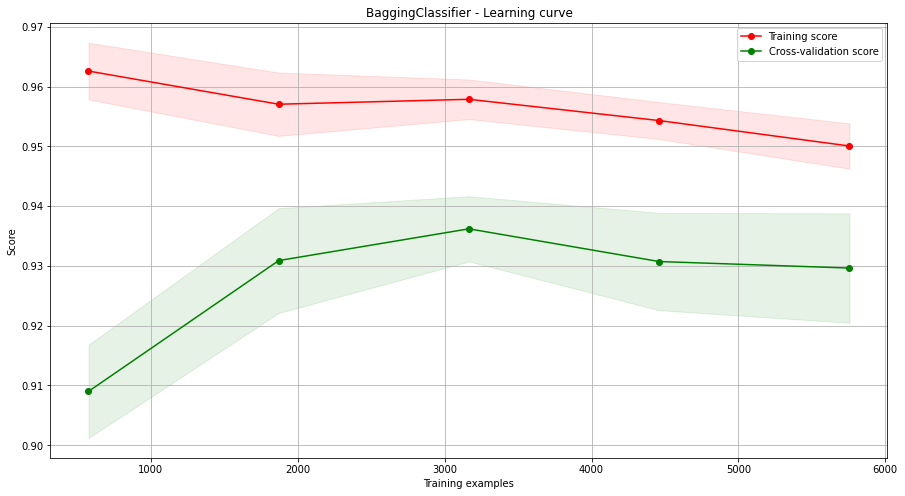

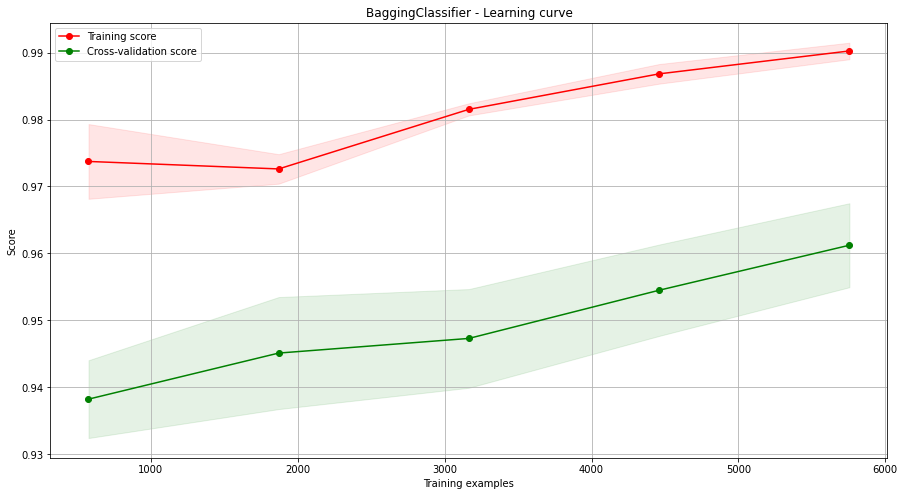

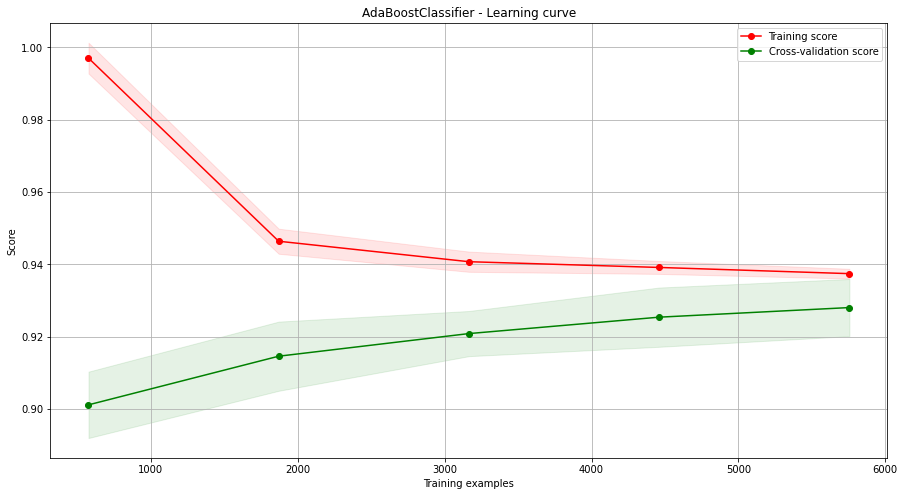

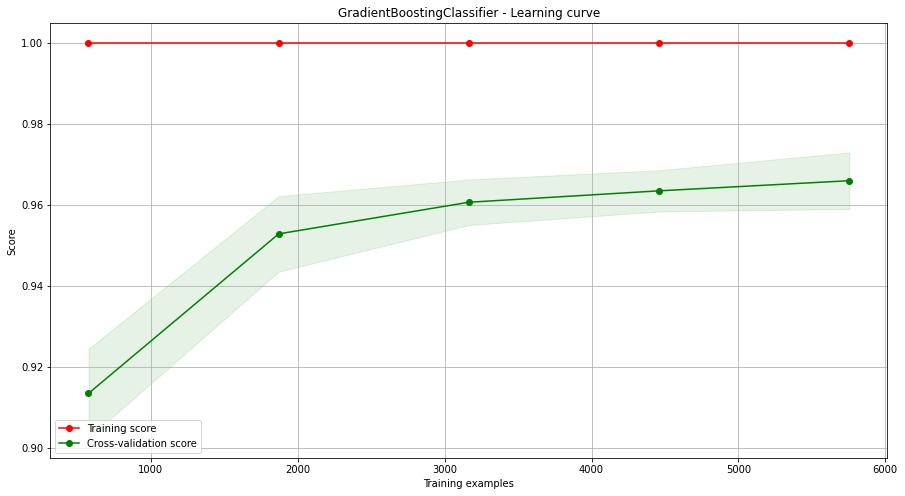

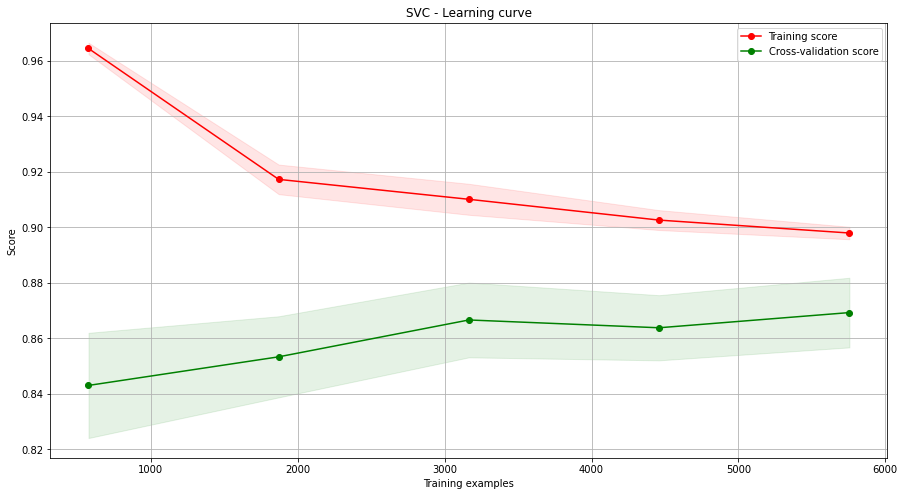

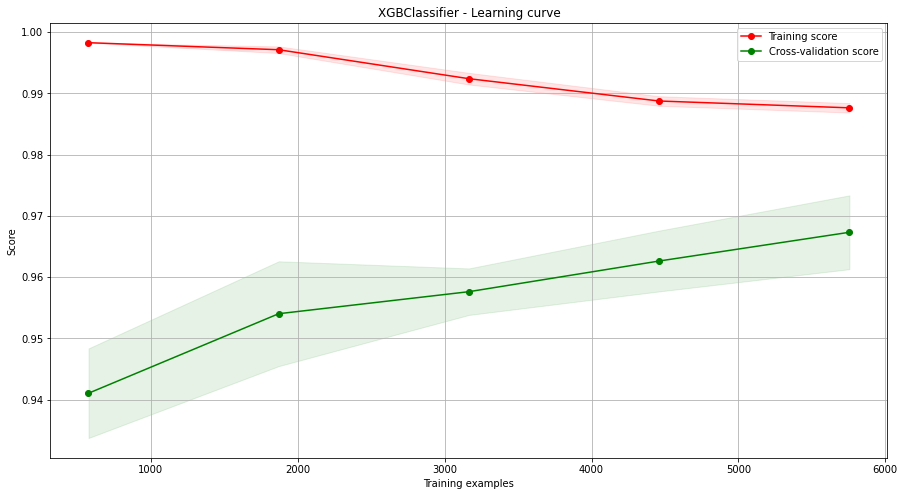

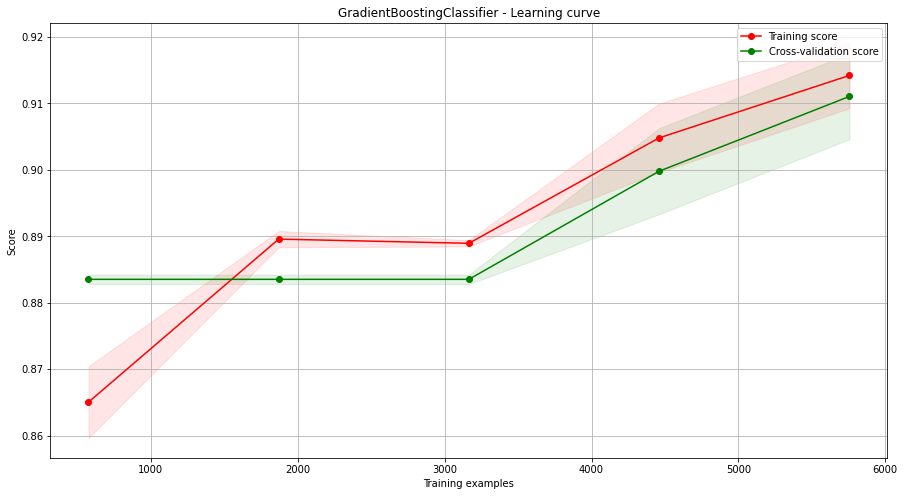

In [13]:
for i in range(len(hyperparams_metrics)):
    pkl_file = open(os.getcwd()+'/'+hyperparams_metrics['model_path'][i],'rb')
    model_pkl=pickle.load(pkl_file)    
    plot_learning_curve(estimator = model_pkl,title = f"{hyperparams_metrics['model'][i]} - Learning curve",
                    X = X_train, y = y_train, cv = K_fold)
    
    
                

**Observaciones:**

- Se confirma la hipótesis anterior de los cuatro mejores estimadores se obtienen de los cuatro modelos ya mencionados:

    * BaggingClassifier
    * XGBClassifier
    * RandomForestClassifier
    * GradientBoostingClassifier

- Mejora en las métricas, gracias a la modificación de los hiperparámetros. 

**Propuestas:**

- Realizar un **balanceo de los datos**, con el fin de seguir mejorando las métricas y ajustar al máximo el modelo.
- También comprobar si realizando un **tratamiento previo de los datos** se ve mejorado el modelo:
    * Feature selection
    * Feature engineering




<a href='2b_ML_BalancedData.ipynb'>Ver siguiente notebook</a>